In [2]:
# Block 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [10]:
# Block 2: Load Datasets

red_wine = pd.read_csv('/content/winequality-red.csv', delimiter=';') # Specify delimiter for red wine
white_wine = pd.read_csv('/content/winequality-white.csv', delimiter=';') # Specify delimiter for white wine

# Add a column to distinguish between red and white wine
red_wine['wine_type'] = 0  # 0 for red wine
white_wine['wine_type'] = 1  # 1 for white wine

# Combine datasets
data = pd.concat([red_wine, white_wine], axis=0)

In [11]:
# Block 3: Display Basic Information
data.info()
print(data.describe())

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    

In [12]:
# Block 3: Display Basic Information
data.info()
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    

In [13]:
# Check for missing values
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64


<ipython-input-22-692761e8be78>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=data, palette='viridis')


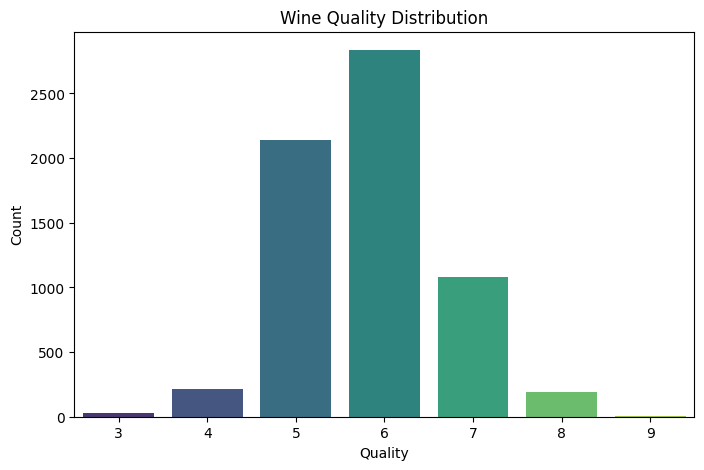

<ipython-input-22-692761e8be78>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=data, palette='coolwarm')


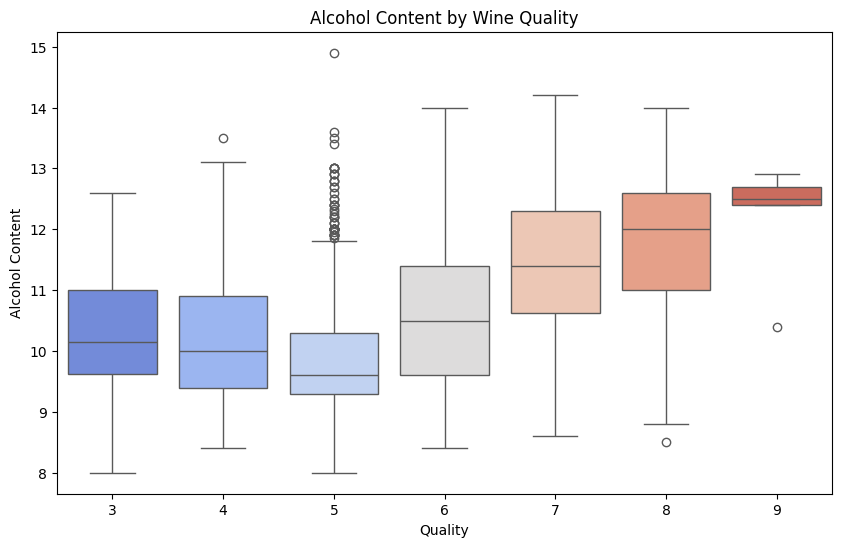

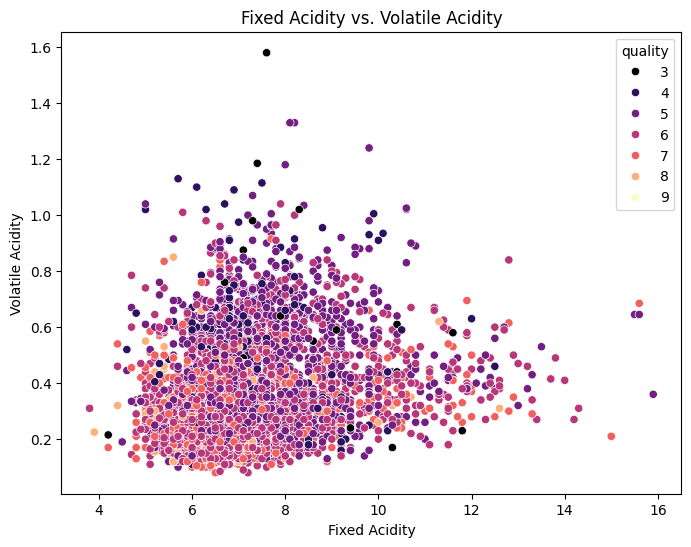

In [22]:
# Additional Visualization: Quality Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=data, palette='viridis')
plt.title('Wine Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

# Additional Visualization: Alcohol Content vs. Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=data, palette='coolwarm')
plt.title('Alcohol Content by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol Content')
plt.show()

# Additional Visualization: Fixed Acidity vs. Volatile Acidity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='fixed acidity', y='volatile acidity', hue='quality', data=data, palette='magma')
plt.title('Fixed Acidity vs. Volatile Acidity')
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.show()

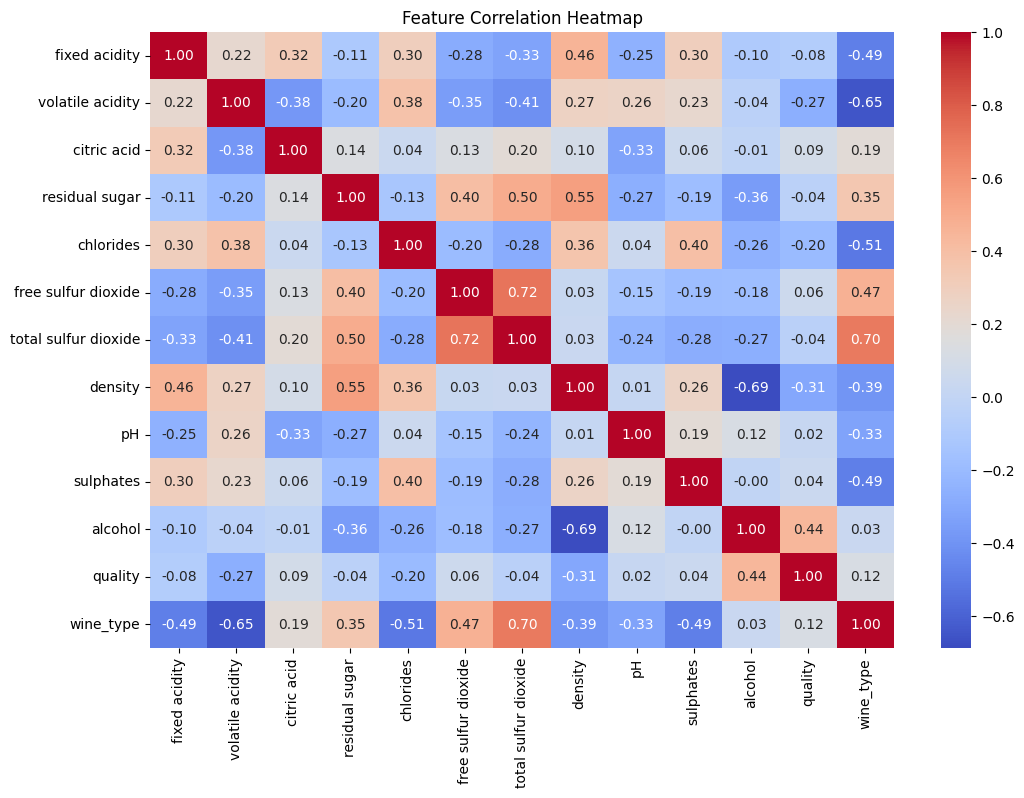

In [14]:
# Block 4: Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


In [16]:
# Block 5: Define Features and Target Variable
X = data.drop(columns=['quality'])
y = data['quality']

# Convert quality to a classification problem
y = np.where(y >= 6, 1, 0)  # Good quality (1) if 6 or more, otherwise bad (0)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Block 6: Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Block 7: Train RandomForest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Block 8: Predictions and Evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8269230769230769
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.73      0.75       451
           1       0.86      0.88      0.87       849

    accuracy                           0.83      1300
   macro avg       0.81      0.81      0.81      1300
weighted avg       0.83      0.83      0.83      1300

Confusion Matrix:
 [[331 120]
 [105 744]]
